# Case Study: Landsat

A recent Landsat dataset showing how the river changes:

* https://earthobservatory.nasa.gov/images/147999/river-colors-are-changing

Download two Landsat image files of the Rio Grande from 1986 and 2020.

```
# 1986
wget https://eoimages.gsfc.nasa.gov/images/imagerecords/147000/147999/riogrande_tm5_1986163_lrg.jpg

# 2020
wget https://eoimages.gsfc.nasa.gov/images/imagerecords/147000/147999/riogrande_oli_2020161_lrg.jpg
```

|1986| 2020 |
|:--|:--|
|![](https://eoimages.gsfc.nasa.gov/images/imagerecords/147000/147999/riogrande_tm5_1986163_lrg.jpg)|![](https://eoimages.gsfc.nasa.gov/images/imagerecords/147000/147999/riogrande_oli_2020161_lrg.jpg)|



# Import images and subset to the lake in the top left corner

Import any needed python libraries.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import imageio
import skimage.color
import skimage.transform
import scipy.ndimage as ndimage

Load both images

In [2]:
image_1986 = np.asarray(imageio.imread("riogrande_tm5_1986163_lrg.jpg"))
image_2020 = np.asarray(imageio.imread("riogrande_oli_2020161_lrg.jpg"))

%whos

Variable     Type       Data/Info
---------------------------------
image_1986   ndarray    1848x1848x3: 10245312 elems, type `uint8`, 10245312 bytes (9.77069091796875 Mb)
image_2020   ndarray    1848x1848x3: 10245312 elems, type `uint8`, 10245312 bytes (9.77069091796875 Mb)
imageio      module     <module 'imageio' from '/<...>ges/imageio/__init__.py'>
ndimage      module     <module 'scipy.ndimage' f<...>ipy/ndimage/__init__.py'>
np           module     <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
plt          module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
skimage      module     <module 'skimage' from '/<...>ges/skimage/__init__.py'>


Subset the image to the lake in the top left corner.

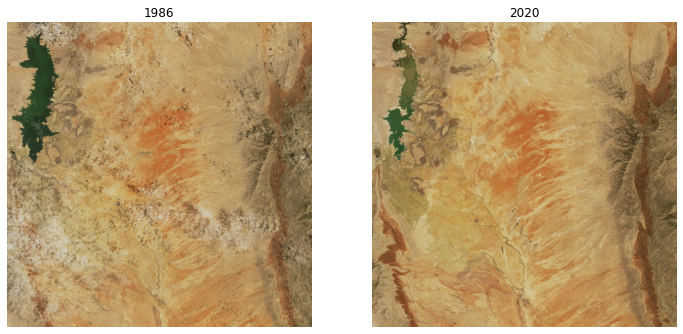

In [3]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(image_1986)
plt.axis('off')
plt.title("1986")

plt.subplot(1,2,2)
plt.imshow(image_2020)
plt.axis('off')
plt.title("2020")

plt.show()

Focus on the body of water.

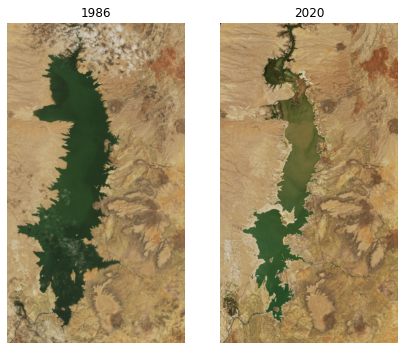

In [4]:
plt.figure(figsize=(7,6))

plt.subplot(1,2,1)
plt.imshow(image_1986[1:900,1:500])
plt.axis('off')
plt.title("1986")

plt.subplot(1,2,2)
plt.imshow(image_2020[1:900,1:500])
plt.axis('off')
plt.title("2020")

plt.show()

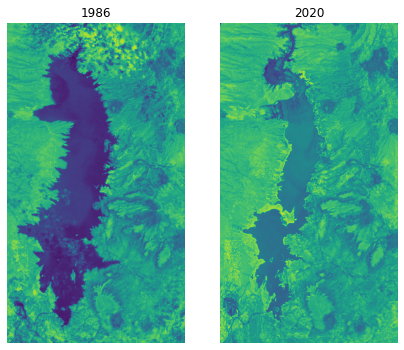

In [5]:
def preproc(image):
    result = image[1:900, 1:500]
#    result[:,:,1]=0
    return(result[:,:,1:2])

plt.figure(figsize=(7,6))

plt.subplot(1,2,1)
plt.imshow(preproc(image_1986))
plt.axis('off')
plt.title("1986")

plt.subplot(1,2,2)
plt.imshow(preproc(image_2020))
plt.axis('off')
plt.title("2020")

plt.show()

Identify body of water, sum up area.

Look at the paper to see how they identified bodies of water. They seemed to use a method of converting RGB values to human perceived colorspace.

```
X = 2.7689 * R + 1.7517 * G + 1.1302 * B
Y = 1.000 * R + 4.5907 * G + 0.0601 * B
Z = 0.000 * R + 0.0565 * G + 5.5943 * B
```

Normalized.

```
x = X / (X+Y+Z)
y = Y / (X+Y+Z)
z = Z / (X+Y+Z)
```

Calculate a hue angle(alpha):

```
alpha = (arctan2 ((x - 0.33)/(y - 0.33)))*(180/x)
```

Hmm, attempt to implement and see what an alpha image looks like. Does it represent the bodies of water or not.